### House Price Prediction using Statistical Techniques

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

plt.rcParams.update({'font.family':'Gabriola', 'font.serif':['Gabriola']})
plt.rcParams.update({'pdf.fonttype': 'truetype', 'font.size': 20})
pd.set_option('display.max_rows',500)

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.shape,test.shape

((1460, 81), (1459, 80))

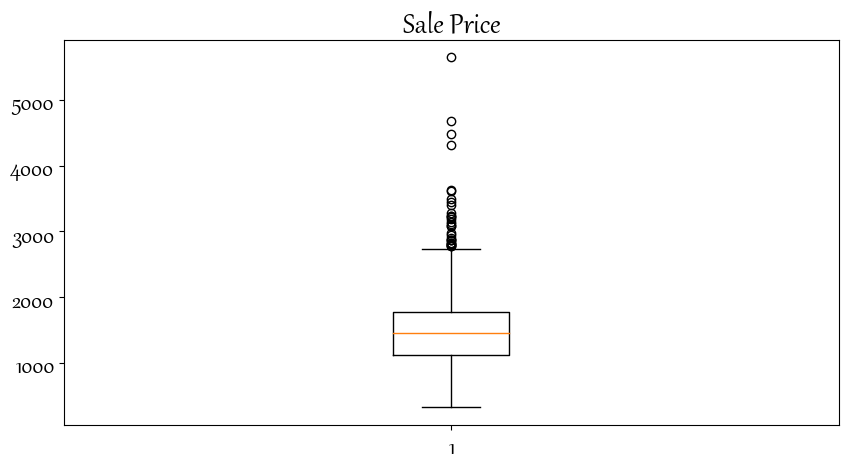

In [22]:
plt.figure(figsize=(10,5))
plt.boxplot(train['GrLivArea'])
plt.title('Sale Price')
plt.show()

In [5]:
train[['SalePrice','GrLivArea']].corr()

SalePrice  GrLivArea
SalePrice   1.000000   0.708624
GrLivArea   0.708624   1.000000

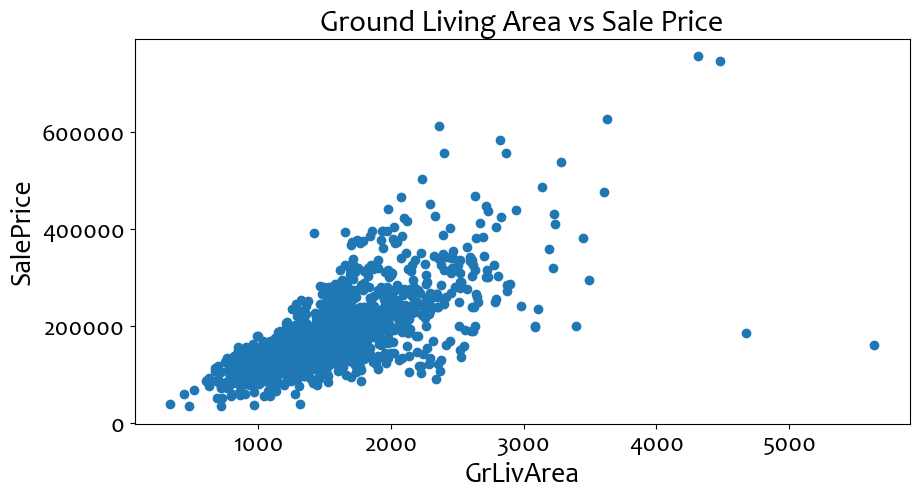

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(x = train['GrLivArea'], y=train['SalePrice'])
plt.title('Ground Living Area vs Sale Price')
plt.ylabel('SalePrice', fontsize=20)
plt.xlabel('GrLivArea', fontsize=20)
plt.show()

In [7]:
outlier_index = train[(train['SalePrice']<250000) & (train['GrLivArea']>4500)].index # drop Outliers - explain
train = train.drop(outlier_index)

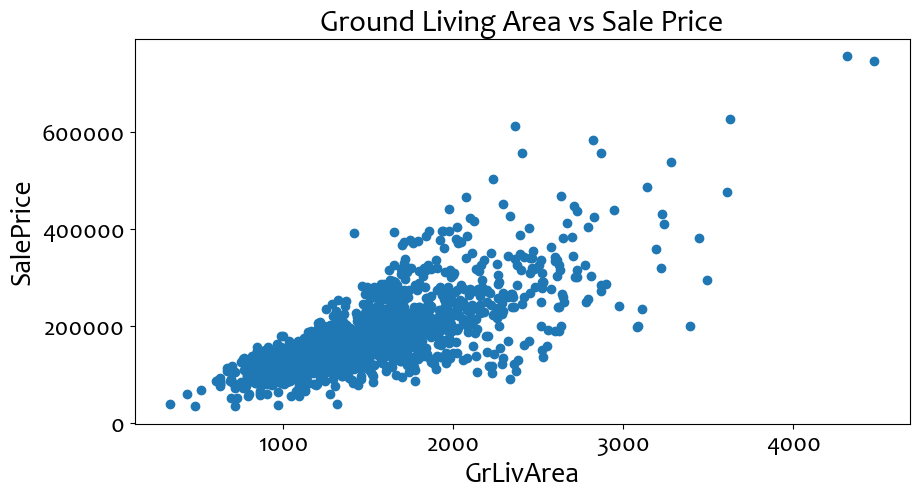

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.title('Ground Living Area vs Sale Price')
plt.ylabel('SalePrice', fontsize=20)
plt.xlabel('GrLivArea', fontsize=20)
plt.show()

In [9]:
y = train['SalePrice']

In [10]:
train_missing_data = train.isnull().mean() * 100 # check % of missing values
train_missing_data.sort_values(ascending=False)[:20]

PoolQC          99.588477
MiscFeature     96.296296
Alley           93.758573
Fence           80.727023
FireplaceQu     47.325103
LotFrontage     17.764060
GarageYrBlt      5.555556
GarageCond       5.555556
GarageType       5.555556
GarageFinish     5.555556
GarageQual       5.555556
BsmtFinType2     2.606310
BsmtExposure     2.606310
BsmtQual         2.537723
BsmtCond         2.537723
BsmtFinType1     2.537723
MasVnrArea       0.548697
MasVnrType       0.548697
Electrical       0.068587
Id               0.000000
dtype: float64

In [11]:
#Proceed to impute the values 1by1 - after checking value counts - justify each column decision

train['PoolQC'].fillna('None',inplace=True)
train['MiscFeature'].fillna('None',inplace=True)
train['Alley'].fillna('None',inplace=True)
train['Fence'].fillna('None',inplace=True)
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0], inplace=True)
train['FireplaceQu'].fillna('None',inplace=True)

train['LotFrontage'] = train['LotFrontage'].fillna(train.groupby('Neighborhood')['LotFrontage'].transform('median'))

train['GarageYrBlt'].fillna(0, inplace=True)
train['GarageCond'].fillna('None',inplace=True)
train['GarageType'].fillna('None',inplace=True)
train['GarageFinish'].fillna('None',inplace=True)
train['GarageQual'].fillna('None',inplace=True)

train['BsmtFinType2'].fillna('None',inplace=True)
train['BsmtExposure'].fillna('None',inplace=True)
train['BsmtQual'].fillna('None',inplace=True)
train['BsmtCond'].fillna('None',inplace=True)
train['BsmtFinType1'].fillna('None',inplace=True)

train['MasVnrArea'].fillna(train['MasVnrArea'].median(), inplace=True)
train['Electrical'].fillna(train['MasVnrType'].mode()[0],inplace=True)

In [12]:
test_missing_data = test.isnull().mean() * 100 # check % of missing values
test_missing_data.sort_values(ascending=False)[:35]

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageCond       5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtQual         3.015764
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
BsmtFullBath     0.137080
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
TotalBsmtSF      0.068540
Exterior2nd      0.068540
GarageCars       0.068540
Exterior1st      0.068540
GarageArea       0.068540
SaleType         0.068540
MiscVal          0.000000
BedroomAbvGr     0.000000
dtype: float64

In [13]:
test['PoolQC'].fillna('None',inplace=True)
test['MiscFeature'].fillna('None',inplace=True)
test['Alley'].fillna('None',inplace=True)
test['Fence'].fillna('None',inplace=True)
test['MasVnrType'].fillna(test['MasVnrType'].mode()[0], inplace=True)
test['FireplaceQu'].fillna('None',inplace=True)

test['LotFrontage'] = test['LotFrontage'].fillna(test.groupby('Neighborhood')['LotFrontage'].transform('median'))

test['GarageYrBlt'].fillna(0, inplace=True)
test['GarageCond'].fillna('None',inplace=True)
test['GarageType'].fillna('None',inplace=True)
test['GarageFinish'].fillna('None',inplace=True)
test['GarageQual'].fillna('None',inplace=True)

test['BsmtFinType2'].fillna('None',inplace=True)
test['BsmtExposure'].fillna('None',inplace=True)
test['BsmtQual'].fillna('None',inplace=True)
test['BsmtCond'].fillna('None',inplace=True)
test['BsmtFinType1'].fillna('None',inplace=True)

test['MasVnrArea'].fillna(test['MasVnrArea'].median(), inplace=True)
test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0], inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0], inplace=True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median(), inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median(), inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median(), inplace=True)
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median(), inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)
test['GarageCars'].fillna(test['GarageCars'].mode()[0], inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)
test['GarageArea'].fillna(test['GarageArea'].median(), inplace=True)
test['SaleType'].fillna(test['SaleType'].mode()[0], inplace=True)

In [14]:
data = pd.concat([train,test],axis=0)
data.shape

(2917, 81)

In [15]:
data['AgeOfHouse'] = 2023 - data['YearBuilt']
data['AgeRemod'] = 2023 - data['YearRemodAdd']
data['TotalSqFt'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']

In [16]:
data['MSSubClass'] = data['MSSubClass'].astype(str)

In [17]:
data.drop(['Id','YearBuilt','YearRemodAdd','SalePrice'],axis=1,inplace=True)

In [18]:
num_cols = data.dtypes[data.dtypes != "object"].index

In [19]:
data = pd.get_dummies(data,drop_first=True,dtype='uint8')
data.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0       706.0   
1         80.0     9600            6            8         0.0       978.0   
2         68.0    11250            7            5       162.0       486.0   
3         60.0     9550            7            5         0.0       216.0   
4         84.0    14260            8            5       350.0       655.0   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         0.0      150.0        856.0       856  ...               0   
1         0.0      284.0       1262.0      1262  ...               0   
2         0.0      434.0        920.0       920  ...               0   
3         0.0      540.0        756.0       961  ...               0   
4         0.0      490.0       1145.0      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 274 columns]

In [20]:
train = data.iloc[:len(train)]
train.shape

(1458, 274)

In [21]:
test = data.iloc[len(train):]
test.shape

(1459, 274)

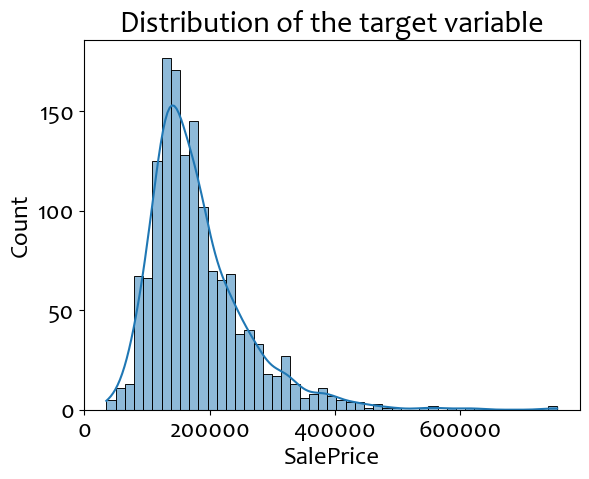

In [22]:
sns.histplot(y,kde=True)
plt.title('Distribution of the target variable')
plt.show()

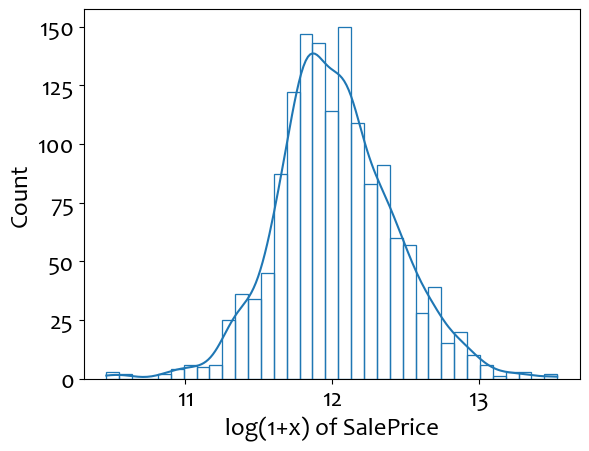

In [23]:
sns.histplot(np.log1p(y),kde=True,fill=False)
plt.xlabel('log(1+x) of SalePrice')
plt.show()

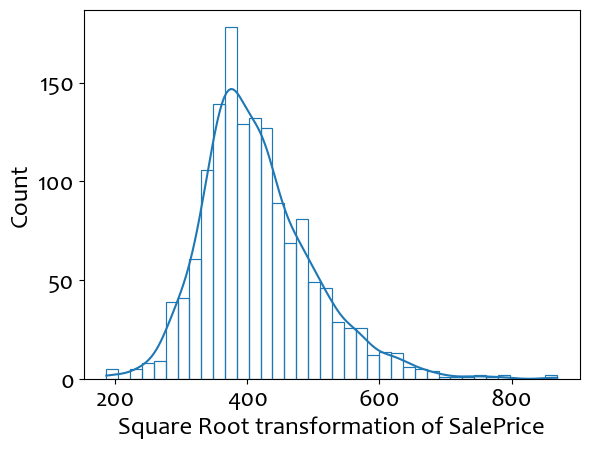

In [24]:
sns.histplot(np.sqrt(y),kde=True,fill=False)
plt.xlabel('Square Root transformation of SalePrice')
plt.show()

In [25]:
y= np.log1p(y)

In [26]:
def get_skewness(df):
    skewed_cols = df[num_cols].apply(lambda x : skew(x)).sort_values(ascending=False)
    skewness = pd.DataFrame({'skew' : skewed_cols})
    skewness = skewness[abs(skewness['skew'])>0.75]
    return skewness

In [27]:
train_skewness = get_skewness(train)
train_skewness

skew
MiscVal        24.434913
PoolArea       15.932532
LotArea        12.560986
3SsnPorch      10.286510
LowQualFinSF    8.995688
KitchenAbvGr    4.480268
BsmtFinSF2      4.247550
ScreenPorch     4.114690
BsmtHalfBath    4.095895
EnclosedPorch   3.083987
MasVnrArea      2.693554
OpenPorchSF     2.337421
LotFrontage     1.546624
WoodDeckSF      1.544214
GrLivArea       1.009951
BsmtUnfSF       0.919955
1stFlrSF        0.886723
2ndFlrSF        0.812121
TotalSqFt       0.803494
BsmtFinSF1      0.764002
GarageYrBlt    -3.862401

In [28]:
skewed_cols = train_skewness.index
train[skewed_cols] = np.log1p(train[skewed_cols])

C:\Users\HN464GK\AppData\Local\Temp\ipykernel_50132\1180761908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[skewed_cols] = np.log1p(train[skewed_cols])


In [29]:
test_skewness = get_skewness(test)
test_skewness

skew
PoolArea       20.176117
MiscVal        20.054543
LowQualFinSF   16.150628
3SsnPorch      12.511336
EnclosedPorch   4.664371
KitchenAbvGr    4.074860
BsmtFinSF2      4.038796
ScreenPorch     3.784349
BsmtHalfBath    3.779085
LotArea         3.112013
OpenPorchSF     2.685015
MasVnrArea      2.546947
WoodDeckSF      2.128569
1stFlrSF        1.556592
TotalSqFt       1.214443
BsmtFinSF1      1.165227
GrLivArea       1.129240
BsmtUnfSF       0.919678
2ndFlrSF        0.911944
TotRmsAbvGrd    0.841731
Fireplaces      0.819015
TotalBsmtSF     0.813285
GarageYrBlt    -3.947954

In [30]:
skewed_cols = test_skewness.index
test[skewed_cols] = np.log1p(test[skewed_cols])

C:\Users\HN464GK\AppData\Local\Temp\ipykernel_50132\2049217432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[skewed_cols] = np.log1p(test[skewed_cols])


In [31]:
X = train.copy()
X.shape,y.shape

((1458, 274), (1458,))

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model_0 = LinearRegression()
model_0.fit(X,y)

LinearRegression()

In [34]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['SalePrice'] = np.expm1(model_0.predict(test))
sample_submission_df.to_csv('data/submission0.csv', index=False)
sample_submission_df.head()

Id      SalePrice
0  1461  246494.958090
1  1462  333632.215474
2  1463  363099.811687
3  1464  401241.651012
4  1465  276685.352875

In [35]:
train['SalePrice'] = y
highly_corr_cols = train.corr()['SalePrice'].sort_values(ascending=False).head(11).index.tolist()
highly_corr_cols

C:\Users\HN464GK\AppData\Local\Temp\ipykernel_50132\312190142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice'] = y


['SalePrice',
 'OverallQual',
 'TotalSqFt',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'Foundation_PConc']

In [36]:
highly_corr_cols.remove('SalePrice')

In [37]:
X = train[highly_corr_cols]

In [38]:
model_1 = LinearRegression()
model_1.fit(X,y)

LinearRegression()

In [39]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['SalePrice'] = np.expm1(model_1.predict(test[highly_corr_cols]))
sample_submission_df.to_csv('data/submission1.csv', index=False)
sample_submission_df.head()

Id      SalePrice
0  1461  114439.646245
1  1462  147954.647736
2  1463  155720.736350
3  1464  171789.314516
4  1465  210636.684121

In [40]:
import statsmodels.api as sm

In [41]:
X = train.drop('SalePrice',axis=1)
X = sm.add_constant(X)
model_2 = sm.OLS(y,X).fit()

In [42]:
model_2.params

const                    7.250996e+00
LotFrontage              1.041362e-02
LotArea                  9.900214e-02
OverallQual              3.469060e-02
OverallCond              3.870851e-02
MasVnrArea               1.411666e-03
BsmtFinSF1               1.578902e-02
BsmtFinSF2               2.985285e-03
BsmtUnfSF               -5.306630e-03
TotalBsmtSF              5.536487e-05
1stFlrSF                -1.498715e-02
2ndFlrSF                -1.341251e-03
LowQualFinSF            -5.008849e-03
GrLivArea                2.726548e-01
BsmtFullBath             2.302967e-02
BsmtHalfBath             8.058952e-03
FullBath                 2.655773e-02
HalfBath                 2.251679e-02
BedroomAbvGr            -4.381829e-03
KitchenAbvGr            -1.193265e-01
TotRmsAbvGrd             4.003294e-03
Fireplaces               1.551267e-02
GarageYrBlt             -2.131872e-01
GarageCars               2.493352e-02
GarageArea               7.041605e-05
WoodDeckSF               3.376615e-03
OpenPorchSF 

In [43]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     86.73
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:25:18   Log-Likelihood:                 1466.0
No. Observations:                1458   AIC:                            -2398.
Df Residuals:                    1191   BIC:                            -986.9
Df Model:                         266                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.25

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

C:\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features         VIF
179          BsmtQual_None         inf
236      GarageFinish_None         inf
51           MSSubClass_90         inf
112        BldgType_Duplex         inf
136     Exterior1st_CBlock         inf
246        GarageCond_None         inf
150     Exterior2nd_CBlock         inf
182          BsmtCond_None         inf
192      BsmtFinType1_None         inf
241        GarageQual_None         inf
235        GarageType_None         inf
0                    const  8091867.11
22             GarageYrBlt   128177.88
30                PoolArea    10498.52
253            PoolQC_None    10210.98
248          GarageCond_TA      277.82
243          GarageQual_TA      227.14
122        RoofStyle_Gable      165.62
124          RoofStyle_Hip      153.72
41           MSSubClass_20      147.97
258       MiscFeature_None      141.31
46           MSSubClass_60      129.74
144    Exterior1st_VinylSd      120.20
159    Exterior2nd_VinylSd      110.78
36               TotalSqFt      106.95
200       BsmtFinType2_Unf      102.78
171           ExterCond_TA       91.75
230      GarageType_Attchd       85.37
13               GrLivArea       85.27
140    Exterior1st_MetalSd       81.18
239          GarageQual_Fa       80.61
244          GarageCond_Fa       79.46
169           ExterCond_Gd       77.54
45           MSSubClass_50       76.14
154    Exterior2nd_MetalSd       75.34
116      HouseStyle_1Story       74.50
7               BsmtFinSF2       72.33
234      GarageType_Detchd       68.83
138    Exterior1st_HdBoard       63.28
260       MiscFeature_Shed       60.99
40          MSSubClass_190       58.93
163        MasVnrType_None       57.37
11                2ndFlrSF       56.21
152    Exterior2nd_HdBoard       55.54
145    Exterior1st_Wd Sdng       55.00
54             MSZoning_RL       52.05
267           SaleType_New       51.09
160    Exterior2nd_Wd Sdng       49.51
274  SaleCondition_Partial       48.47
114        BldgType_TwnhsE       46.51
198      BsmtFinType2_None       45.72
111        BldgType_2fmCon       45.05
49           MSSubClass_80       42.66
119      HouseStyle_2Story       41.40
137    Exterior1st_CemntBd       41.38
201           Heating_GasA       41.09
31                 MiscVal       39.90
151    Exterior2nd_CmentBd       39.23
188      BsmtExposure_None       38.38
156    Exterior2nd_Plywood       37.86
6               BsmtFinSF1       35.22
55             MSZoning_RM       35.03
141    Exterior1st_Plywood       32.76
47           MSSubClass_70       32.75
42           MSSubClass_30       31.28
10                1stFlrSF       31.11
194       BsmtFinType1_Unf       30.14
9              TotalBsmtSF       28.24
5               MasVnrArea       28.19
162     MasVnrType_BrkFace       28.16
227       FireplaceQu_None       27.88
83      Neighborhood_NAmes       25.86
240          GarageQual_Gd       25.43
121        HouseStyle_SLvl       24.92
202           Heating_GasW       24.83
245          GarageCond_Gd       22.55
232     GarageType_BuiltIn       21.53
88    Neighborhood_OldTown       20.86
113         BldgType_Twnhs       20.37
44           MSSubClass_45       19.69
247          GarageCond_Po       19.28
167           ExterQual_TA       19.17
34              AgeOfHouse       18.38
52             MSZoning_FV       18.25
168           ExterCond_Fa       17.87
115      HouseStyle_1.5Unf       17.67
76    Neighborhood_CollgCr       16.11
135    Exterior1st_BrkFace       15.87
226         FireplaceQu_Gd       15.78
105        Condition2_Norm       15.73
229         FireplaceQu_TA       14.91
48           MSSubClass_75       14.91
166           ExterQual_Gd       14.53
92    Neighborhood_Somerst       14.04
50           MSSubClass_85       13.19
78    Neighborhood_Edwards       13.03
180            BsmtQual_TA       12.21
120      HouseStyle_SFoyer       12.02
164       MasVnrType_Stone       11.78
161    Exterior2nd_Wd Shng       11.67
38          MSSubClass_160       11.43
203           Heating_Grav       11.14
2

In [47]:
high_vif = vif[vif['VIF']>2.5].index
vif = vif.drop(high_vif)
vif

Features   VIF
254             Fence_GdWo  2.50
228         FireplaceQu_Po  2.46
101        Condition1_RRAn  2.44
196       BsmtFinType2_GLQ  2.42
71           LandSlope_Sev  2.41
107        Condition2_PosN  2.33
142      Exterior1st_Stone  2.32
109        Condition2_RRAn  2.29
237       GarageFinish_RFn  2.29
133    Exterior1st_AsphShn  2.19
185        BsmtExposure_Gd  2.17
193       BsmtFinType1_Rec  2.16
131       RoofMatl_WdShake  2.16
206           HeatingQC_Fa  2.10
212       Electrical_FuseP  2.08
127       RoofMatl_Membran  2.08
189       BsmtFinType1_BLQ  2.07
215       Electrical_SBrkr  2.07
219        Functional_Maj2  2.06
170           ExterCond_Po  2.01
70           LandSlope_Mod  1.99
128         RoofMatl_Metal  1.99
191       BsmtFinType1_LwQ  1.97
271   SaleCondition_Alloca  1.96
26             OpenPorchSF  1.95
99         Condition1_PosN  1.95
66       LotConfig_CulDSac  1.94
186        BsmtExposure_Mn  1.92
69        LotConfig_Inside  1.87
249           PavedDrive_P  1.82
56             Street_Pave  1.82
100        Condition1_RRAe  1.80
211       Electrical_FuseF  1.78
27           EnclosedPorch  1.77
264         SaleType_ConLD  1.75
61            LotShape_Reg  1.74
270  SaleCondition_AdjLand  1.72
207           HeatingQC_Gd  1.71
223         Functional_Sev  1.71
25              WoodDeckSF  1.64
103        Condition1_RRNn  1.64
72    Neighborhood_Blueste  1.60
65        Utilities_NoSeWa  1.59
139    Exterior1st_ImStucc  1.57
98         Condition1_PosA  1.56
268           SaleType_Oth  1.52
175       Foundation_Stone  1.51
132       RoofMatl_WdShngl  1.50
15            BsmtHalfBath  1.49
266         SaleType_ConLw  1.47
256             Fence_MnWw  1.47
155      Exterior2nd_Other  1.46
67           LotConfig_FR2  1.45
272   SaleCondition_Family  1.44
59            LotShape_IR2  1.41
208           HeatingQC_Po  1.40
33                  YrSold  1.35
29             ScreenPorch  1.34
60            LotShape_IR3  1.32
265         SaleType_ConLI  1.31
129          RoofMatl_Roll  1.31
28               3SsnPorch  1.30
262           SaleType_CWD  1.30
176        Foundation_Wood  1.29
32                  MoSold  1.27
68           LotConfig_FR3  1.25
263           SaleType_Con  1.22
102        Condition1_RRNe  1.20
214        Electrical_None  1.17
37          MSSubClass_150   NaN

In [48]:
X = X.drop('MSSubClass_150',axis=1)

In [51]:
MSSubClass_150_index = vif[vif['Features']=='MSSubClass_150'].index
vif = vif.drop(MSSubClass_150_index)

In [52]:
X[vif['Features']].shape

(1458, 69)

In [53]:
X = sm.add_constant(X[vif['Features']])
model_2 = sm.OLS(y,X).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     18.47
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          6.08e-150
Time:                        00:29:02   Log-Likelihood:                -256.37
No. Observations:                1458   AIC:                             652.7
Df Residuals:                    1388   BIC:                             1023.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    21.5500     12.143      1.775      0.076      -2.271      45.371
Fence_GdWo               -0.1159      0.042     -2.733      0.006      -0.199      -0.033
FireplaceQu_Po           -0.1781      0.070     -2.557      0.011      -0.315      -0.041
Condition1_RRAn          -0.0211      0.060     -0.353      0.724      -0.138       0.096
BsmtFinType2_GLQ         -0.0103      0.090     -0.115      0.908      -0.187       0.166
LandSlope_Sev            -0.0436      0.096     -0.456      0.648      -0.231       0.144
Condition2_PosN           0.6690      0.305      2.191      0.029       0.070       1.268
Exterior1st_Stone         0.4041      0.229      1.764      0.078      -0.045       0.853
Condition2_RRAn           0.1002      0.300      0.334      0.738      -0.488       0.689
GarageFinish_RFn          0.0713      0.018      3.921      0.000       0.036       0.107
Exterior1st_AsphShn      -0.2763      0.297     -0.932      0.352      -0.858       0.305
BsmtExposure_Gd           0.2325      0.030      7.694      0.000       0.173       0.292
BsmtFinType1_Rec         -0.0626      0.029     -2.186      0.029      -0.119      -0.006
RoofMatl_WdShake          0.1335      0.145      0.919      0.358      -0.151       0.418
HeatingQC_Fa             -0.1989      0.046     -4.338      0.000      -0.289      -0.109
Electrical_FuseP         -0.1745      0.192     -0.908      0.364      -0.551       0.202
RoofMatl_Membran          0.2058      0.325      0.633      0.527      -0.432       0.843
BsmtFinType1_BLQ         -0.1225      0.027     -4.537      0.000      -0.175      -0.070
Electrical_SBrkr          0.1860      0.033      5.601      0.000       0.121       0.251
Functional_Maj2          -0.4197      0.134     -3.135      0.002      -0.682      -0.157
ExterCond_Po             -0.6807      0.300     -2.271      0.023      -1.269      -0.093
LandSlope_Mod            -0.0347      0.040     -0.872      0.384      -0.113       0.043
RoofMatl_Metal           -0.5009      0.318     -1.576      0.115      -1.125       0.123
BsmtFinType1_LwQ         -0.0641      0.038     -1.699      0.090      -0.138       0.010
SaleCondition_Alloca      0.0132      0.087      0.151      0.880      -0.158       0.185
OpenPorchSF               0.0567      0.004     14.309      0.000       0.049       0.064
Condition1_PosN           0.0306      0.075      0.408      0.684      -0.117       0.178
LotConfig_CulDSac         0.0394      0.039      1.019      0.309      -0.036       0.115
BsmtExposure_Mn           0.0633      0.030      2.138      0.033       0.005       0.121
LotConfig_Inside         -0.0176      0.021     -0.827      0.408      -0.059       0.024
PavedDrive_P             -0.0535      0.057     -0.944      0.345      -0.165       0.058
Street_Pave            

Most research papers consider a VIF (Variance Inflation Factor) > 10 as an indicator of multicollinearity, but some choose a more conservative threshold of 5 or even 2.5.

In [55]:
test1 = test[vif['Features']]
test1 = sm.add_constant(test1)

sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['SalePrice'] = np.expm1(model_2.predict(test1))
sample_submission_df.to_csv('data/submission2.csv', index=False)
sample_submission_df.head()

Id      SalePrice
0  1461  162803.742140
1  1462  214778.581827
2  1463  187665.592750
3  1464  210539.455111
4  1465  229293.254267

In [56]:
X = train.drop('SalePrice',axis=1)
X.shape,y.shape,test.shape

((1458, 274), (1458,), (1459, 274))

In [57]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [58]:
model_ridge = Ridge()

In [59]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

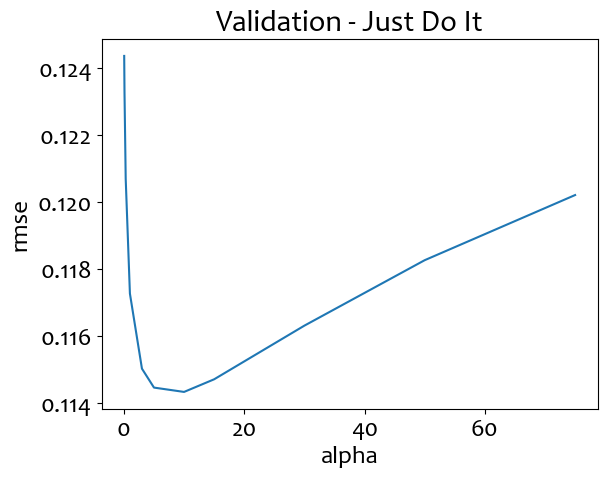

In [60]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [61]:
cv_ridge.min()


0.11432564943311807

In [62]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X, y)


In [63]:
rmse_cv(model_lasso).mean()


0.11350705336159117

In [64]:
coef = pd.Series(model_lasso.coef_, index = X.columns)


In [65]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 99 variables and eliminated the other 175 variables


In [66]:
sample_submission_df = pd.read_csv('data/sample_submission.csv')
sample_submission_df['SalePrice'] = np.expm1(model_lasso.predict(test))
sample_submission_df.to_csv('data/submission3.csv', index=False)
sample_submission_df.head()

Id      SalePrice
0  1461  150717.257614
1  1462  190035.256750
2  1463  227014.431451
3  1464  252831.031352
4  1465  206028.915089

clear the code, 